# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [29]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:20, :-1].values
y = dataset.iloc[:20, -1].values
X,y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       dtype=int64))

## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
print(X_train)

[[    45  26000]
 [    27  84000]
 [    32  18000]
 [    19  76000]
 [    26  43000]
 [    27  58000]
 [    18  82000]
 [    35  65000]
 [    32 150000]
 [    47  25000]
 [    26  52000]
 [    27  57000]
 [    19  19000]
 [    29  80000]
 [    20  86000]]


In [32]:
print(y_train)

[1 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


In [33]:
print(X_test)

[[   46 28000]
 [   35 20000]
 [   48 29000]
 [   25 33000]
 [   26 80000]]


In [34]:
print(y_test)

[1 0 1 0 0]


## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
print(X_train)

[[ 1.94760245 -1.06158818]
 [-0.19001     0.67773709]
 [ 0.40377124 -1.30149512]
 [-1.14005997  0.43783015]
 [-0.30876624 -0.55178595]
 [-0.19001    -0.10196045]
 [-1.25881622  0.61776036]
 [ 0.76003998  0.10795812]
 [ 0.40377124  2.6569693 ]
 [ 2.18511495 -1.09157655]
 [-0.30876624 -0.28189065]
 [-0.19001    -0.13194881]
 [-1.14005997 -1.27150675]
 [ 0.0475025   0.55778362]
 [-1.02130373  0.73771382]]


In [38]:
print(X_test)

[[ 2.0663587  -1.00161145]
 [ 0.76003998 -1.24151838]
 [ 2.3038712  -0.97162308]
 [-0.42752249 -0.85166962]
 [-0.30876624  0.55778362]]


## Training the Decision Tree Classification model on the Training set

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [40]:
print(classifier.predict(sc.transform([[30,87000]])))

[1]


## Predicting the Test set results

In [41]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


In [ ]:
# Visualising the Decision Tree Regression results

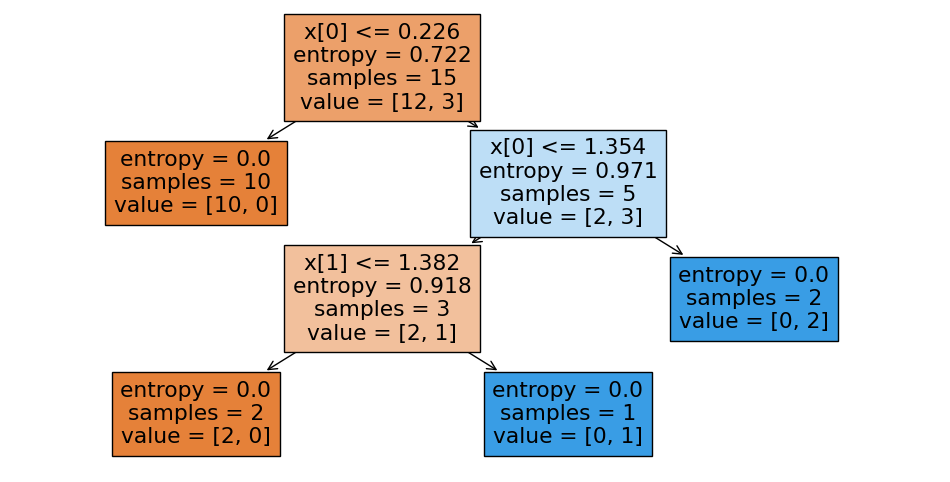

In [42]:
from sklearn import tree
plt.figure(figsize=(12, 6))
tree.plot_tree(classifier, filled=True)
plt.show()

# Hyperparameter tuning for decision tree regression model
# Try different values for hyperparameter and analyze the output. Update comments of below code as per observed output

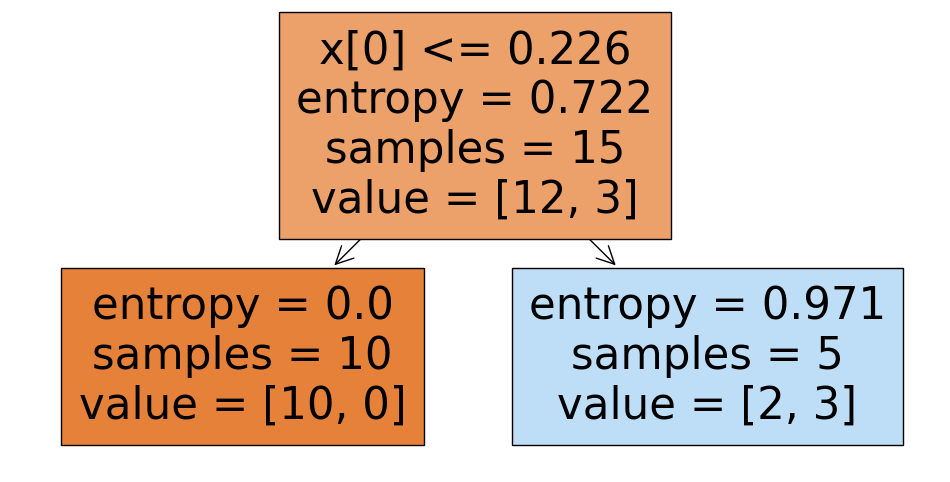

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,
    max_depth=10,      # Set the maximum depth of the tree to 5.
    min_samples_split=5,  # Minimum samples required to split a node.
    min_samples_leaf=5,   # Minimum samples required at a leaf node.
    max_features=2   # Consider all features for splitting
                                   )
classifier.fit(X_train, y_train)
            
plt.figure(figsize=(12, 6))
tree.plot_tree(classifier, filled=True)
plt.show()
                                    

# Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[3 0]
 [0 2]]
